# K-Nearest Neighbours

In this notebook we will see how to implement the _K-Nearest Neighbours_ (__KNN__), using the example provided by SciKit Learn, accessible at the [link](https://python-course.eu/machine-learning/k-nearest-neighbor-classifier-with-sklearn.php).

## Model description

As we know, the SciKit learn divides the setup of the model in three phases: after properly splitting the dataset comes the training and testing phase.

The __training__ phase of the KNN model can be summarized as putting in a conveniente data structure (as a _hash map_ or a _tree_) all the data from the training dataset. This operation is constant in the size of the dataset( $\mathcal{O}(N)$), so essentially linear in the number of points $n$: $\mathcal{O}(n)$. At most, in this part it is possible to show all the dataset in a plane, if it is a 2-dimensional problem

The computationally-hard part is the __testing__ phase. In this phase, for each new point in the test the following point shall be computed:

1. Compute all the distances between the new given point (point in the test dataset) and all the points in the dataset. This operation can be computed in a linear time, $\mathcal{O}(n)$.

1. Sort the data structure by the distances (ideally the smaller distances at the beginning). This operation is the more computationally difficult:
    * by using a naive approach, like the _selection sort_, the time complexity of the operation is $\mathcal{O}(n^2)$
    * choosing the _merge sort_ or the _heap sort_, the time complexity of the operation is $\mathcal{O}(n\log_2n)$
    
    These are just some ideas: the thing to keep in mind is that this part is computationally hard.

1. After sorting the distances, keep the first $K$ (lowest) distances

1. Finally, according to the (weighted) majority, classify properly the point. If somehow there is a tie, the best thing to do is to toss a coin, meaning that the classification will be done randomly because all of the solution are equally right (and equally wrong).

We can deduct that, menwhile the traing part is $\mathcal{O}(n)$, the test part is $\mathcal{O}(mn) + \mathcal{O}(mn^2) = \mathcal{O}(mn^2) \sim \mathcal{O}((\alpha n)n^2) \sim \mathcal{O}(n^3)$ [i.e. with 1M data, the training time si 2s and the test time is 20s].


## Model setup

Through the <tt>sklearn</tt> package we can sintethically create th dataset, by defining the centers per each class (in this case we chose 3 classes). After that, using the <tt>make\_blobs</tt> function, we can generate the dataset.


In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 1], [4, 2], [1, 4]]
n_classes = len(centers)

data, labels = make_blobs(n_samples=1000, 
                          centers=np.array(centers),
                          random_state=1)

Consequently, using the <tt>pyplot</tt> package we can display the generated datas.

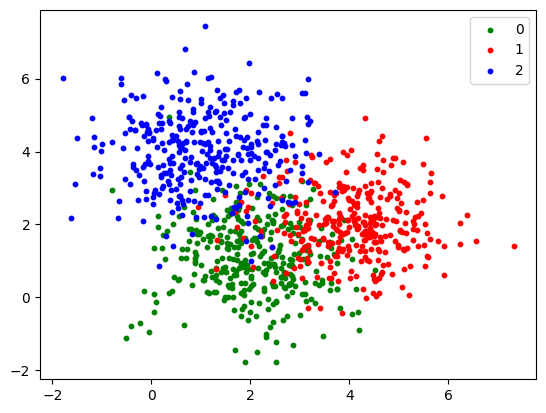

In [2]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

After generating the data, it is needed to split it throught the <tt>train\_test\_split</tt> function. In this case the test subset is 37\% of the total size of the dataset.

In [3]:
from sklearn.model_selection import train_test_split

res = train_test_split(data, labels, 
                       test_size=0.37,
                       random_state=1)

train_data, test_data, train_labels, test_labels = res 

## Learning phase

After splitting the dataset, we can import the __KNN__ model from the <tt>sklearn</tt> package and use the <tt>fit</tt> to train the model, meaning that we are filling the data structure. Noticeably we set the hyperparameter of the model $K$ to 5.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier( n_neighbors=5 )

# training
knn.fit(train_data, train_labels) 

KNeighborsClassifier()

The testing part is what comes next. Here the distance are computed per every point of the test subset and then the structure is sorted by these values.

In [5]:
# testing
predicted = knn.predict(test_data)


print("Predictions from the classifier:")
print(predicted)

print("\nTarget values:")
print(test_labels)

Predictions from the classifier:
[1 2 2 1 2 1 0 2 1 2 1 2 0 0 0 1 1 2 0 0 0 0 1 1 2 2 1 1 1 2 0 0 0 2 0 0 0
 0 0 0 2 0 1 2 2 0 2 0 2 0 2 2 1 0 2 0 0 0 2 1 2 1 2 2 0 2 1 2 0 1 1 0 2 2
 1 2 1 1 0 1 2 0 1 1 1 0 2 2 0 2 1 2 1 1 2 2 1 1 2 0 2 0 0 2 2 0 0 1 2 2 0
 1 0 1 1 2 1 1 0 0 0 0 0 1 1 1 2 2 0 0 2 1 0 1 0 1 1 0 1 1 2 2 1 0 2 0 1 0
 2 1 0 0 1 2 0 1 2 0 0 0 0 1 0 0 0 2 0 2 2 0 2 0 2 2 0 0 0 2 0 1 0 0 0 1 0
 0 1 2 0 1 2 0 0 0 2 0 1 0 1 0 0 2 0 2 1 0 0 0 2 1 1 1 2 1 2 0 1 1 0 0 0 2
 1 2 0 0 0 2 0 1 0 1 0 0 2 2 2 0 2 0 1 0 1 0 2 1 1 1 2 0 2 1 0 1 2 2 1 0 2
 1 0 0 0 2 2 1 1 1 0 1 2 0 2 1 0 0 1 2 2 1 1 1 1 0 2 2 2 0 2 2 2 0 2 2 0 1
 0 0 2 2 2 2 0 2 0 2 0 1 2 0 1 0 2 1 2 0 0 0 2 0 1 0 0 1 0 1 0 2 2 1 1 1 2
 0 0 1 2 1 1 2 2 1 0 1 1 0 2 0 1 0 2 0 0 2 1 1 1 0 2 0 2 1 1 0 0 0 1 0 0 2]

Target values:
[1 1 2 1 2 1 0 2 1 0 1 2 0 2 1 1 1 2 0 0 0 0 1 0 2 2 1 1 1 2 0 0 2 2 0 0 2
 0 1 0 2 0 1 2 2 0 0 0 2 0 2 2 0 0 2 1 0 2 0 2 2 1 2 2 0 2 1 2 0 1 1 0 2 2
 0 2 1 1 0 0 2 0 0 0 1 0 2 2 0 2 1 2 1 1 2 2 1 1 2

## Evaluation

By checking the _report_ we can see that both the precision and the recall are close to 1, this is due to the fact that we used few data and they were sintetically generated.


In [6]:
from sklearn.metrics import classification_report

print(classification_report(predicted, test_labels))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       145
           1       0.80      0.81      0.81       110
           2       0.87      0.92      0.89       115

    accuracy                           0.84       370
   macro avg       0.84      0.84      0.84       370
weighted avg       0.84      0.84      0.84       370

